**Markdown Code: Importing libraries**
1. initiate a `try` loop
2. import the Beautiful soup library
3. import pandas library
4. import matplotlib library and name it plt
5. create a print statment that lets you know these are installed
6. initiate the `except` to the `try` loop
7. import `sys` librabry
8. conda or pip install beautiful soup
9. conda or pip install pandas
10. write code to import beautiful soup
11. write code to import pandas
12. write a print statement that lets you know that the libraries are being installed
13. import requests outside of the except function

In [198]:
try:
  from bs4 import BeautifulSoup
  import pandas
  import matplotlib.pyplot as plt
  print ("BeautifulSoup and Pandas are already installed and imported")

except:
  import sys
  !conda install --yes --prefix {sys.prefix} bs4
  !conda install --yes --prefix {sys.prefix} pandas
  from bs4 import BeautifulSoup
  import pandas
  print ("BeautifulSoup and Pandas were not found. Installed them and imported")
import requests


BeautifulSoup and Pandas are already installed and imported


**Markdown Code: Retrieving and Parsing Website**
1. create a variable name that is equal to website URL
2. make a variable name that is equal to code that gets the URL
3. make a variable that uses beauitful soup to parse through the text


In [ ]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'

page = requests.get(url)
print("Webpage opened successfully...")

bs = BeautifulSoup(page.text, 'html.parser')
print("Webpage loaded and parsed...")


Webpage opened successfully...
Webpage loaded and parsed...


**Markdown Code: Finding data on website**
1. open a list called raw data
2. create a variable name that is equal to calling beautiful soup to find the data table on website
3. create a for loop that loops through rows in variable name created above
4. create a variable that is equal to code the reads through each line of text
5. Add to raw data list
6. print raw data list


In [ ]:
raw_data = []

table = bs.find_all("table")[0] #Since there are multiple tables this code is pulling the first table with [0]

for row in table: #this loop is having python read the file line by line
    line = row.text
    raw_data.append(line)# adds the data to the raw_data list

print("This is the raw data: ", raw_data)

This is the raw data:  ['\n', '\nRank\n\nName\n\nIndustry\n\nRevenue\n\nProfit\n\nEmployees\n\nHeadquarters[note 1]\n\nState-owned\n\nRef.\n\n\nUSD millions\n\n\n1\n\nWalmart\nRetail\n $611,289\n$11,680\n2,100,000\n United States\n\n[1]\n\n\n2\n\nSaudi Aramco\nOil and gas\n $603,651\n$159,069\n70,496\n Saudi Arabia\n\n[4]\n\n\n3\n\nState Grid Corporation of China\nElectricity\n $530,009\n$8,192\n870,287\n\n China\n\n\n\n[5]\n\n\n4\n\nAmazon\nRetail\n $513,983\n−$2,722\n1,541,000\n\n United States\n\n\n\n[6]\n\n\n5\n\nVitol\n\nCommodities\n\n $505,000\n\n$15,000\n\n1,560\n\n\xa0\xa0Switzerland\n\n\n\n[7][8]\n\n\n6\n\nChina National Petroleum Corporation\n\nOil and gas\n\n $483,019\n$21,080\n1,087,049\n China\n\n[9]\n\n\n7\n\nChina Petrochemical Corporation\nOil and gas\n $471,154\n$9,657\n527,487\n China\n\n[10]\n\n\n8\n\nExxonMobil\n\nOil and gas\n\n $413,680\n$55,740\n63,000\n United States\n\n[11]\n\n\n9\n\nApple\nElectronics\n $394,328\n$99,803\n164,000\n United States\n\n[12]\n\n\n

**Markdown Code: Creating Data Frame From Scraped Data and Cleaning Data**
1. create a headers list with the names of your headers
2. set a variable that is equal to code that reads through the html code that is equal to `tr`
3. open a final data list
4. create `for` loop that loops through the scraped data set and add data to final data list
5. Use pandas to create a data frame with data and column names
6. Drop any unused or unneeded columns
7. Drop any duplicate items
8. drop any none or null cells
9. reset index numbers
10. call data frame
11. Create CSV file from data frame


In [199]:
#hard code of the headers
column_names = ["Name", "Industry", "Revenue (USD Millions)",
                "Profit (USD Millions)", "Employees","Headquarters"," "
                ,"Reference Number"]

column_data = table.find_all("tr") #this code is looking through the html 'tr' tag which is what the table is located in on the wikipedia site


final_data = []


#This code is looking through the html specifically for the data in the table
for row in column_data:
  row_data = row.find_all('td') #finding all data in rows of the 'td' tag
  individual_row_data = [data.text.strip() for data in row_data] #reading through data and striping any '\n\ in row_data
  final_data.append(individual_row_data)



#Setting up the data frame
final_data = pandas.DataFrame(final_data)
final_data.columns = column_names

#These two rows are taking out unwanted columns
final_data = final_data.drop(columns = " ")
final_data = final_data.drop(columns = "Reference Number")

final_data = final_data.drop_duplicates()#this code takes out any duplicates
final_data = final_data.dropna() #this code takes out any none values

#This code is reseting my index numbers so that they start at one
final_data = final_data.reset_index(drop = True)
final_data.index = final_data.index + 1


final_data #calling the data frame



,Name,Industry,Revenue (USD Millions),Profit (USD Millions),Employees,Headquarters
1,Walmart,Retail,"$611,289","$11,680","2,100,000",United States
2,Saudi Aramco,Oil and gas,"$603,651","$159,069","70,496",Saudi Arabia
3,State Grid Corporation of China,Electricity,"$530,009","$8,192","870,287",China
4,Amazon,Retail,"$513,983","−$2,722","1,541,000",United States
5,Vitol,Commodities,"$505,000","$15,000","1,560",Switzerland
6,China National Petroleum Corporation,Oil and gas,"$483,019","$21,080","1,087,049",China
7,China Petrochemical Corporation,Oil and gas,"$471,154","$9,657","527,487",China
8,ExxonMobil,Oil and gas,"$413,680","$55,740","63,000",United States
9,Apple,Electronics,"$394,328","$99,803","164,000",United States
10,Shell,Oil and gas,"$386,201","$20,120","93,000",United Kingdom


In [192]:
final_data.to_csv("Largest Companies by Revenue.csv") #creates csv file

**Markdown Code: Cleaning data for statistical analysis**
1. create function that replaces $ and , with nothing
2. Apply the function to numerical rows
3. Set variables that call different columns of the dataset and set data types accordingly

In [190]:
def clean_string_and_convert(final_data):
  final_data = final_data.replace("$","")
  final_data = final_data.replace(",","")
  return final_data

final_data["Employees"] = final_data["Employees"].apply(clean_string_and_convert)
final_data["Revenue (USD Millions)"] = final_data["Revenue (USD Millions)"].apply(clean_string_and_convert)
final_data["Profit (USD Millions)"] = final_data["Profit (USD Millions)"].apply(clean_string_and_convert)

In [191]:
revenue = final_data["Revenue (USD Millions)"].astype(float)
profit = final_data["Profit (USD Millions)"]
employees = final_data["Employees"].astype(float)
Industry = final_data["Industry"]

**Markdown Code: Statistical Analysis**
1. Describe different attribute columns
2. Create histogram of Revenues
3. Create scatterplot of industry versus revenue
4. Create bar graph for the 5 largest companies employee numbers

In [188]:
Industry.describe()

count              50
unique             13
top       Oil and gas
freq               13
Name: Industry, dtype: object

In [ ]:
employees.astype(float).describe()

count    5.000000e+01
mean     3.200794e+05
std      3.940428e+05
min      1.560000e+03
25%      7.029725e+04
50%      2.208800e+05
75%      3.828730e+05
max      2.100000e+06
Name: Employees, dtype: float64

In [ ]:
revenue.astype(int).describe()

count        50.000000
mean     274052.340000
std      124926.376138
min      157403.000000
25%      176779.500000
50%      236358.000000
75%      315328.250000
max      611289.000000
Name: Revenue (USD Millions), dtype: float64

Text(0, 0.5, 'Number of Companies')

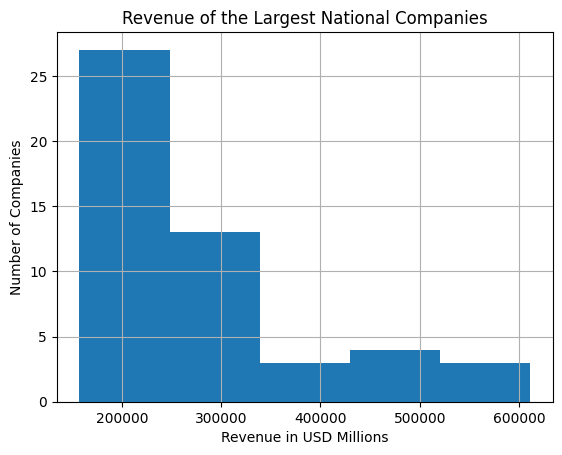

In [178]:
revenue.astype(float).hist(bins = 5)

plt.title("Revenue of the Largest National Companies")

plt.xlabel("Revenue in USD Millions")
plt.ylabel("Number of Companies")

**ANALYSIS:** The histogram effectively illustrates that a substantial majority of companies falls within the revenue range of 200,000 (USD Millions) to 300,000 (USD Millions). This concentration indicates a notable clustering effect, suggesting that a significant number of businesses operate within a relatively narrow band of revenue figures. Moreover, the striking contrast in numbers between the top-performing companies, likely those with exceptionally high revenues, and the larger, more common entities is quite evident. This discrepancy raises intriguing questions about the factors that set these top companies apart and warrants a deeper exploration into the characteristics and strategies contributing to their success.

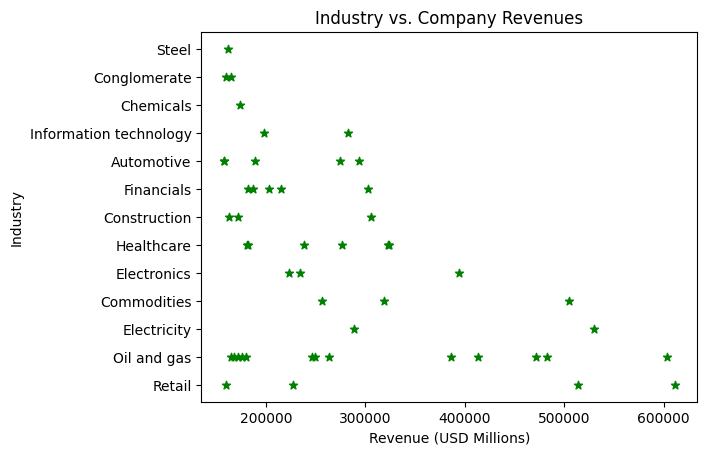

In [205]:
rev = revenue
companies = len(final_data['Name'])
ind = final_data['Industry']

plt.scatter(rev, ind, marker ="*", color = "green")
plt.xlabel("Revenue (USD Millions)")
plt.ylabel("Industry")

# We can add a title too
plt.title("Industry vs. Company Revenues")

plt.show()

In this scatterplot, the distributions of companies exhibit notable trends. Particularly, the oil and gas industries appear to have a significant presence across all revenue levels, indicating the broad range of companies within this sector. Furthermore, the scatterplot suggests that companies with higher revenues are predominantly categorized within industries such as commodities, electricity, oil and gas, and retail. Among these, the retail industry stands out as it appears to host the highest revenue company, signifying its significant economic impact within the dataset. These observations highlight the diverse distribution of companies across industries and underscore the importance of considering industry-specific factors when analyzing company revenues.